# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (90, 90)
lng_range = (-180, 180)

#equator defines the line of zero latitude.

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=4500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=4500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)


1327

In [3]:
#create data frames for weather data
cities_df = pd.DataFrame(cities)
cities_df.columns=['city']
cities_df.head()

,city
0,houston
1,skjervoy
2,ponta do sol
3,boshnyakovo
4,bonavista


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#city iteration varialble
i=0

#for loop to update the URL using each city from the Cities dataFrame
for index, row in cities_df.iterrows():
    
    #error handling
    try:
        #Use If statement to stop when done with cities
        if i <= len(cities):
            #outputs temperature in fahrenheit
            units = "imperial"
            
            city = cities[i]
           
            #update url with the city
            query_url = f"{url}appid={api_key}&q={city}&units={units}"
    
            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
    
            #put the json data into a variable
            coord_lon = weather_json["coord"]["lon"]
            coord_lat = weather_json["coord"]["lat"]
            country = weather_json['sys']["country"]
            #city = weather_json["name"]
            date = weather_json["dt"]
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            clouds = weather_json["clouds"]["all"]
            max_temp = weather_json["main"]["temp_max"]
            wind_speed = weather_json["wind"]["speed"]
            
            #put the data from the variable into the dataframe column
            cities_df.loc[index, "Lng"] = coord_lon
            cities_df.loc[index, "Lat"] = coord_lat
            cities_df.loc[index, "Country"] = country
            cities_df.loc[index, "Date"] = date
            cities_df.loc[index, "Temperature"] = temperature
            cities_df.loc[index, "Humidity"] = humidity
            cities_df.loc[index, "Cloudiness"] = clouds
            cities_df.loc[index, "Max Temp"] = max_temp
            cities_df.loc[index, "Wind speed"] = wind_speed
            #cities_df.loc[index, "sea_level"] = sea_level
    
            #print the data has loaded or print the error message
            print(f'Done loading row {i} city = {city}')
            print(f'--------------------------------------')
         
            i+=1
    
    except (KeyError, IndexError):
        print(f"Sorry, {city} cannot be found. Row number {i}")
    i+=1

Done loading row 0 city = houston
Done loading row 2 city = ponta do sol
Done loading row 4 city = bonavista
Sorry, illoqqortoormiut cannot be found. Row number 6
Done loading row 7 city = flin flon
Done loading row 9 city = avarua
Done loading row 11 city = busselton
Done loading row 13 city = vallenar
Done loading row 15 city = kavieng
Done loading row 17 city = cape town
Done loading row 19 city = sterling
Done loading row 21 city = rikitea
Done loading row 23 city = narsaq
Done loading row 25 city = amersham
Done loading row 27 city = takoradi
Done loading row 29 city = caramay
Done loading row 31 city = ambon
Done loading row 33 city = vila franca do campo
Done loading row 35 city = tavda
Done loading row 37 city = mataura
Sorry, palabuhanratu cannot be found. Row number 39
Done loading row 40 city = hambantota
Done loading row 42 city = vestmannaeyjar
Done loading row 44 city = aklavik
Done loading row 46 city = kerrville
Done loading row 48 city = constitucion
Sorry, belushya gu

Done loading row 407 city = atar
Done loading row 409 city = phalodi
Done loading row 411 city = egvekinot
Done loading row 413 city = moron
Done loading row 415 city = waipawa
Sorry, safaga cannot be found. Row number 417
Done loading row 418 city = isangel
Done loading row 420 city = usinsk
Done loading row 422 city = saint-francois
Done loading row 424 city = assomada
Done loading row 426 city = nokaneng
Done loading row 428 city = ponta delgada
Done loading row 430 city = shalyhyne
Done loading row 432 city = mikkeli
Done loading row 434 city = ca mau
Done loading row 436 city = matagami
Done loading row 438 city = ialibu
Done loading row 440 city = nizwa
Done loading row 442 city = gayny
Done loading row 444 city = mahajanga
Done loading row 446 city = araceli
Done loading row 448 city = seoul
Done loading row 450 city = port-gentil
Done loading row 452 city = khatanga
Done loading row 454 city = byron bay
Sorry, ksenyevka cannot be found. Row number 456
Done loading row 457 city 

Done loading row 797 city = mackay
Done loading row 799 city = vilhena
Done loading row 801 city = kano
Sorry, bur gabo cannot be found. Row number 803
Done loading row 804 city = preston
Done loading row 806 city = spokane
Sorry, chinnammanur cannot be found. Row number 808
Done loading row 809 city = kirksville
Done loading row 811 city = nador
Done loading row 813 city = great yarmouth
Done loading row 815 city = talcahuano
Done loading row 817 city = halifax
Done loading row 819 city = benguela
Done loading row 821 city = shubarshi
Done loading row 823 city = aubenas
Done loading row 825 city = pangai
Done loading row 827 city = ferrol
Done loading row 829 city = qiryat shemona
Done loading row 831 city = xuanhua
Sorry, mahadday weyne cannot be found. Row number 833
Done loading row 834 city = celestun
Done loading row 836 city = adrar
Done loading row 838 city = whitianga
Done loading row 840 city = pundaguitan
Done loading row 842 city = fianarantsoa
Done loading row 844 city = u

Done loading row 1212 city = leningradskiy
Done loading row 1214 city = nicolas bravo
Done loading row 1216 city = sambava
Done loading row 1218 city = oxford
Done loading row 1220 city = athabasca
Done loading row 1222 city = kargasok
Done loading row 1224 city = pemberton
Done loading row 1226 city = lakatoro
Done loading row 1228 city = nuuk
Done loading row 1230 city = springbok
Done loading row 1232 city = mahanoro
Done loading row 1234 city = santiago de cao
Done loading row 1236 city = ust-ilimsk
Done loading row 1238 city = mubi
Done loading row 1240 city = chelmno
Done loading row 1242 city = asasa
Done loading row 1244 city = funtua
Done loading row 1246 city = messina
Done loading row 1248 city = portel
Done loading row 1250 city = goya
Done loading row 1252 city = longhua
Sorry, koungou cannot be found. Row number 1254
Done loading row 1255 city = bouar
Done loading row 1257 city = guanay
Done loading row 1259 city = fasa
Done loading row 1261 city = hamm
Done loading row 1

In [5]:
#drop rows with NA
cities_df = cities_df.dropna(how = 'any')

#save the data to a CSV
cities_df.to_csv("cities")

#row counts
cities_df.count()

city           628
Lng            628
Lat            628
Country        628
Date           628
Temperature    628
Humidity       628
Cloudiness     628
Max Temp       628
Wind speed     628
dtype: int64

In [6]:
#display the first 5 rows of the dataframe
cities_df.head()

,city,Lng,Lat,Country,Date,Temperature,Humidity,Cloudiness,Max Temp,Wind speed
0,houston,-95.37,29.76,US,1.554423e+09,79.79,65.0,1.0,82.99,4.70
1,skjervoy,-46.00,-20.63,BR,1.554424e+09,66.95,94.0,48.0,66.95,1.59
2,ponta do sol,-53.11,48.65,CA,1.554423e+09,30.99,80.0,36.0,30.99,18.01
4,bonavista,-101.88,54.77,CA,1.554419e+09,26.60,68.0,90.0,26.60,10.29
5,orocue,-159.78,-21.21,CK,1.554421e+09,75.20,88.0,24.0,75.20,4.70


# Data Plots

#### Latitude vs. Temperature Plot

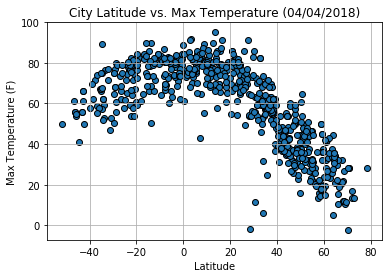

In [16]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Max Temp']]

#write plot
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/04/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

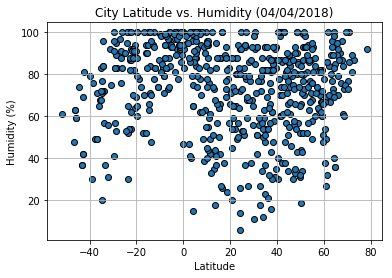

In [17]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Humidity']]

#plot the data
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/04/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("lat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

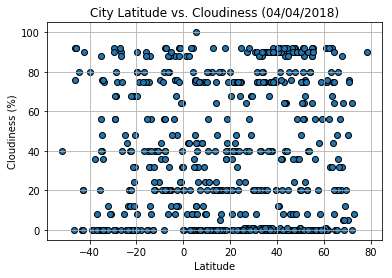

In [18]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Cloudiness']]

#plot the data
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/04/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

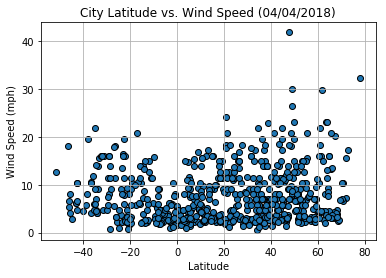

In [19]:
#set plot variables
x = cities_df[['Lat']]
y = cities_df[['Wind speed']]

#plot the data
plt.scatter (x,y, edgecolor = 'black')
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/04/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_windSpeed.png")

plt.show()